In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('Datasets/California_airbnb.csv')

In [3]:
data.shape

(247859, 62)

In [4]:
data.head()

,Date,id,scrape_id,name,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms_text,bedrooms,amenities,host_city,host_country,Country,Zone,City
0,2023-12-10,109,20231203160142,Condo in Culver City,521,2008-06-27,NaN,NaN,50.0,0.0,...,0,0.01,1 bath,2.0,"[""Iron"", ""Cleaning products"", ""Microwave"", ""Fa...",San Francisco,CA,united-states,ca,los-angeles
1,2023-12-10,2708,20231203160142,Rental unit in Los Angeles,3008,2008-09-16,NaN,NaN,100.0,1.0,...,0,0.35,1 bath,1.0,"[""Iron"", ""Fire pit"", ""Self check-in"", ""Cleanin...",Los Angeles,CA,united-states,ca,los-angeles
2,2023-12-10,2732,20231203160142,Rental unit in Santa Monica,3041,2008-09-17,within an hour,100.0,42.0,0.0,...,0,0.16,2 baths,2.0,"[""Sound system"", ""Gas stove"", ""Iron"", ""Drying ...",Santa Monica,CA,united-states,ca,los-angeles
3,2023-12-10,2864,20231203160142,Rental unit in Bellflower,3207,2008-09-25,NaN,NaN,NaN,0.0,...,0,NaN,1 private bath,NaN,"[""Samsung refrigerator"", ""Thermador stainless ...",Bellflower,CA,united-states,ca,los-angeles
4,2023-12-10,63416,20231203160142,Home in Hollywood,309512,2010-12-04,within an hour,100.0,96.0,1.0,...,0,1.02,1.5 shared baths,NaN,"[""Gas stove"", ""Iron"", ""Drying rack for clothin...",Los Angeles,CA,united-states,ca,los-angeles


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247859 entries, 0 to 247858
Data columns (total 62 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Date                                          247859 non-null  object 
 1   id                                            247859 non-null  int64  
 2   scrape_id                                     247859 non-null  int64  
 3   name                                          247859 non-null  object 
 4   host_id                                       247859 non-null  int64  
 5   host_since                                    247829 non-null  object 
 6   host_response_time                            201786 non-null  object 
 7   host_response_rate                            201786 non-null  float64
 8   host_acceptance_rate                          208292 non-null  float64
 9   host_is_superhost                             22

In [6]:
# Calculate the correlation matrix
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bedrooms
id,1.000000,0.022459,0.442735,-0.009952,0.049290,-0.095978,0.074208,0.076040,-0.135532,0.073369,...,-0.039703,-0.084986,-0.039588,0.202038,0.111911,0.055654,0.097093,0.010177,0.144331,-0.015044
scrape_id,0.022459,1.000000,0.004229,-0.001239,-0.019677,0.020908,0.016998,0.011577,0.012046,0.017228,...,0.003320,-0.013429,-0.010009,-0.009245,0.011564,-0.020821,0.031096,0.007723,-0.032273,-0.016299
host_id,0.442735,0.004229,1.000000,-0.038994,0.086307,-0.120422,0.013629,0.007866,-0.211035,-0.035320,...,-0.099857,-0.110019,-0.090826,0.213504,0.042892,-0.016354,0.067483,0.006564,0.115390,-0.007579
host_response_rate,-0.009952,-0.001239,-0.038994,1.000000,0.387438,0.187491,0.038342,0.025205,0.051166,0.033922,...,0.094694,0.045544,0.066033,0.029906,0.027507,0.010881,0.026083,-0.000548,0.122830,0.000976
host_acceptance_rate,0.049290,-0.019677,0.086307,0.387438,1.000000,0.201835,0.066019,0.069057,0.023130,0.028177,...,0.003175,-0.022048,-0.004584,0.246910,0.078231,0.057356,0.053085,-0.024905,0.240305,-0.002821
host_is_superhost,-0.095978,0.020908,-0.120422,0.187491,0.201835,1.000000,-0.138973,-0.145135,0.080593,0.036401,...,0.204744,0.153822,0.211281,-0.054513,-0.135339,-0.115859,-0.075187,-0.059150,0.273083,0.004205
host_listings_count,0.074208,0.016998,0.013629,0.038342,0.066019,-0.138973,1.000000,0.976480,0.022870,0.066266,...,-0.142670,-0.067489,-0.136083,-0.009316,0.615856,0.816800,0.121311,-0.013990,-0.085325,-0.014036
host_total_listings_count,0.076040,0.011577,0.007866,0.025205,0.069057,-0.145135,0.976480,1.000000,0.024850,0.067916,...,-0.148378,-0.069026,-0.145185,0.004417,0.575002,0.791798,0.089620,-0.011706,-0.089839,-0.013885
host_has_profile_pic,-0.135532,0.012046,-0.211035,0.051166,0.023130,0.080593,0.022870,0.024850,1.000000,0.055656,...,0.033678,0.028554,0.022492,-0.033505,0.024731,0.020539,0.014511,0.009479,0.005290,0.001839
host_identity_verified,0.073369,0.017228,-0.035320,0.033922,0.028177,0.036401,0.066266,0.067916,0.055656,1.000000,...,-0.011266,-0.021895,-0.020093,0.036372,0.073883,0.072823,0.034151,0.025908,0.026030,-0.002818


<Axes: >

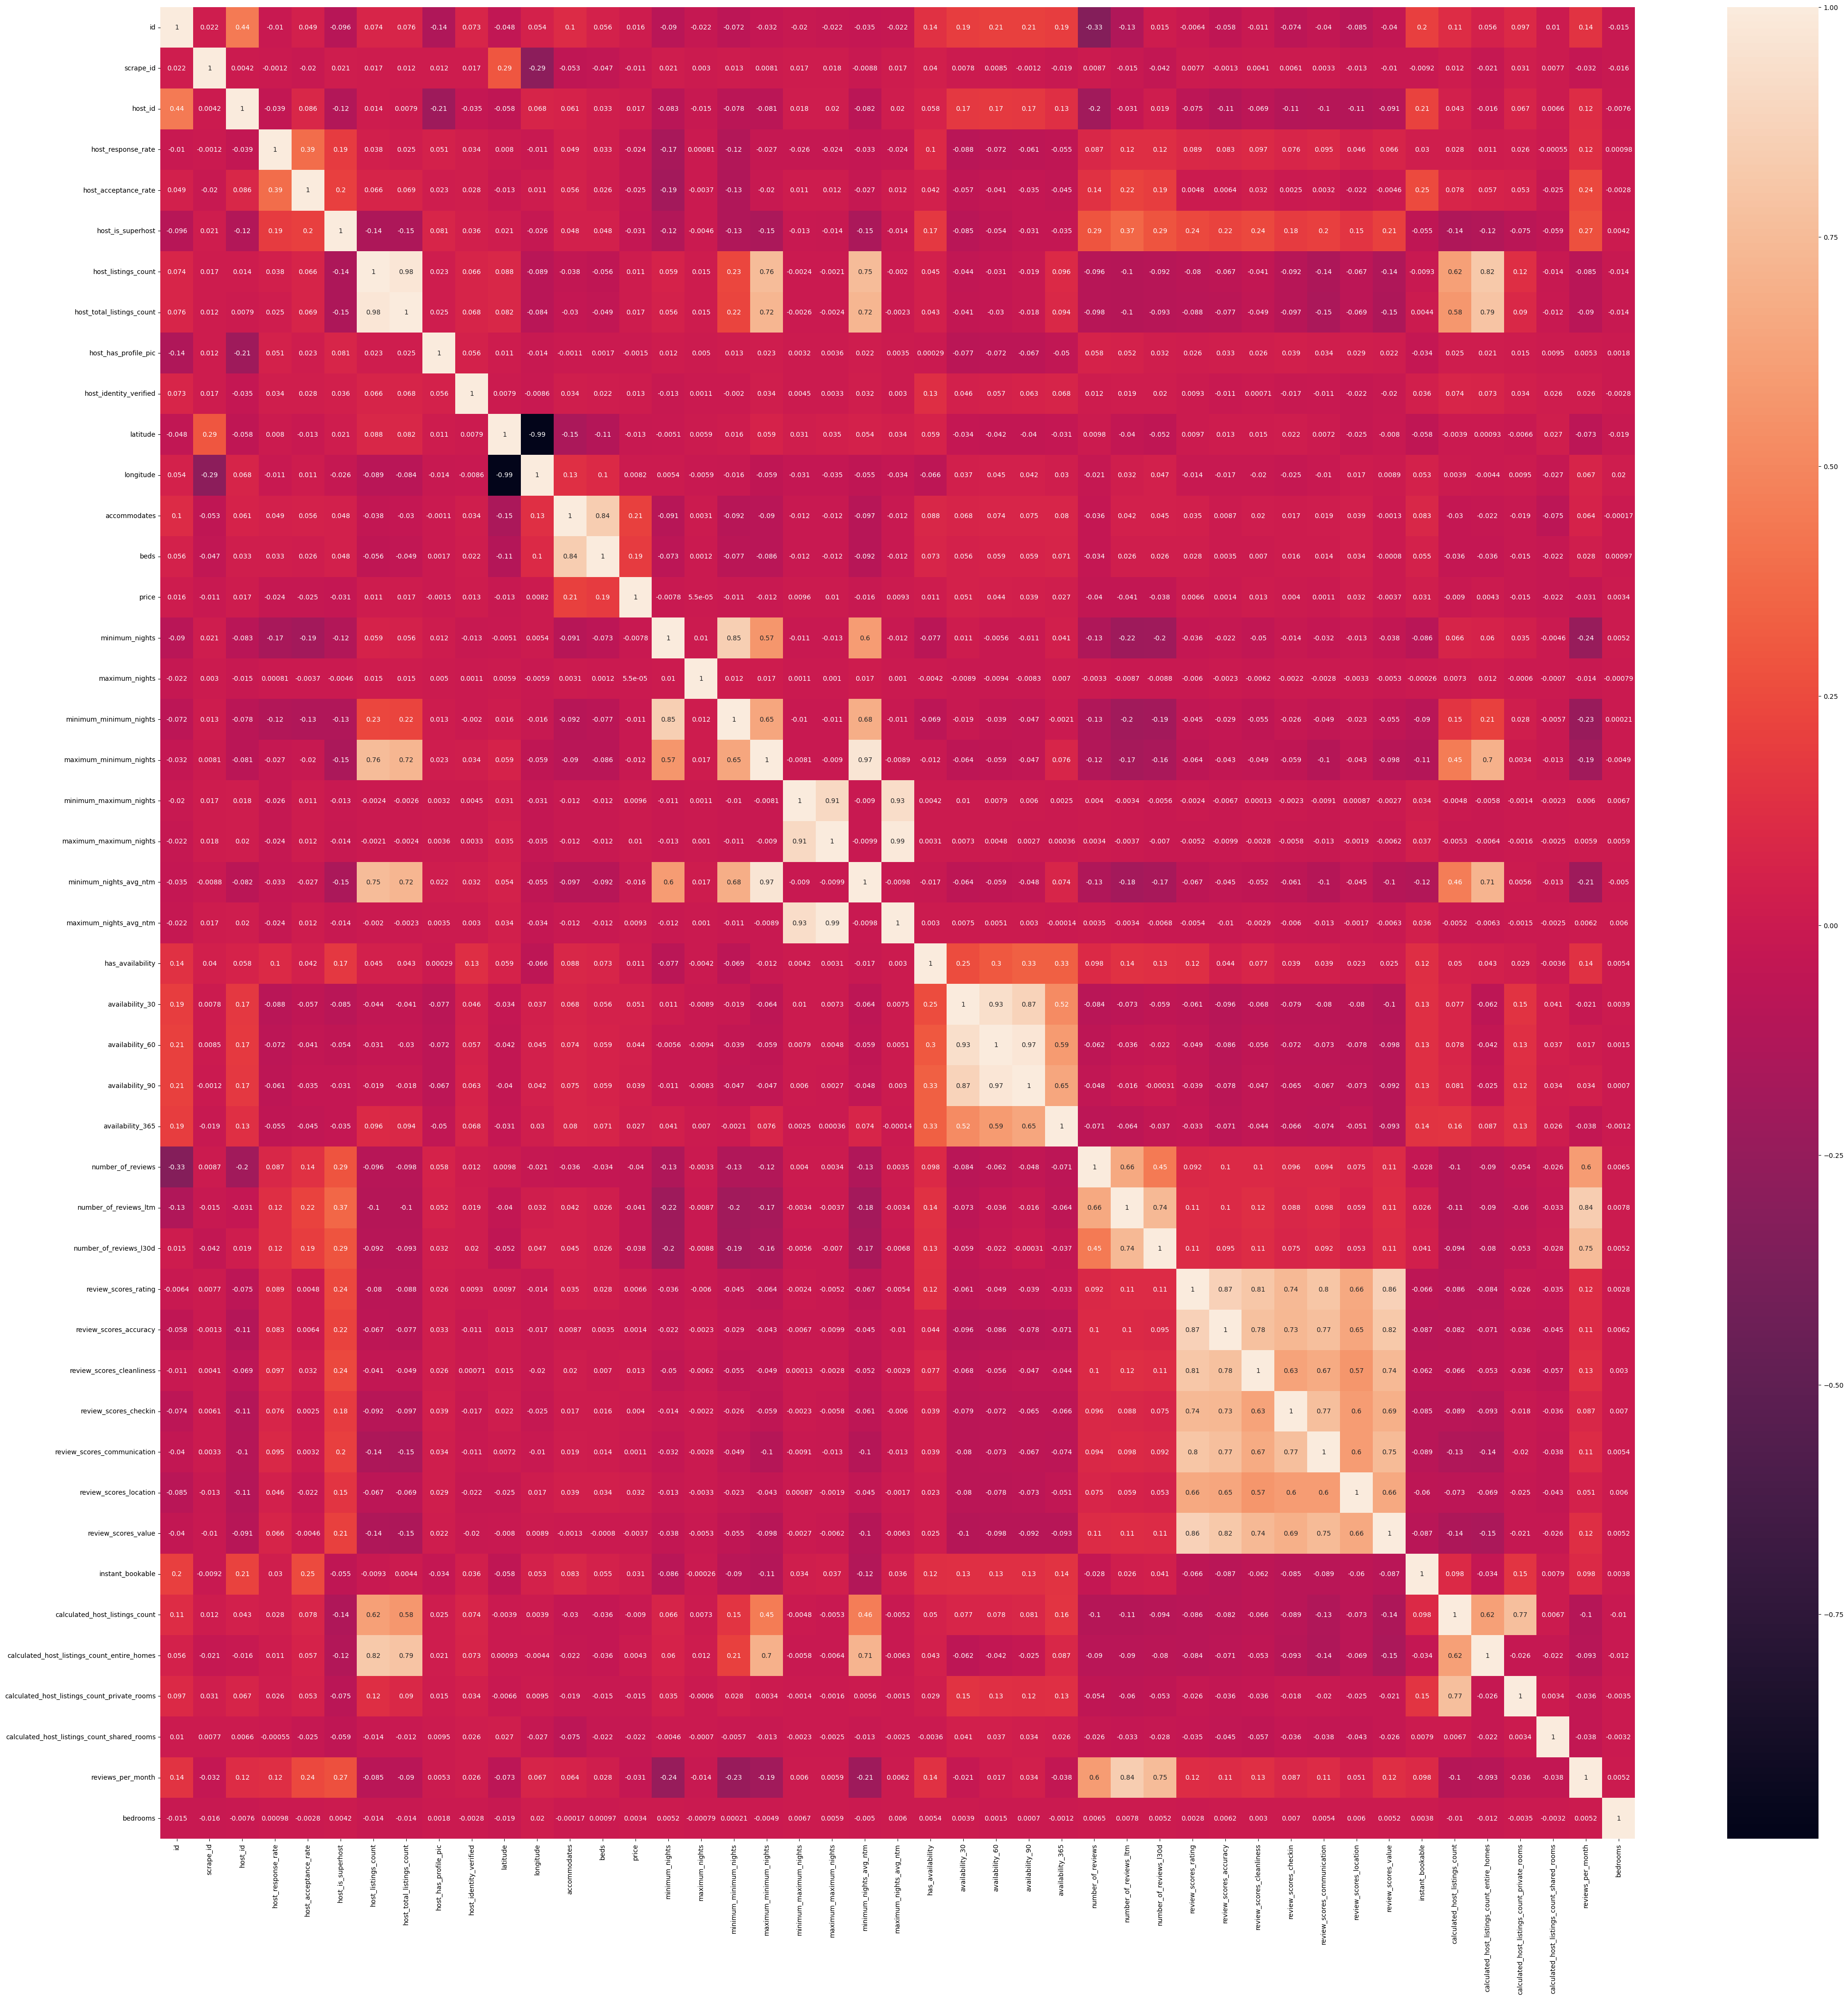

In [7]:
plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True)

In [8]:
# Filter the correlation matrix to find correlations greater than 0.7
high_corr = corr_matrix[corr_matrix >= 0.7]

In [9]:
# Extract feature names with high correlation
high_corr_features = set()
for col in high_corr:
    high_corr_features.update(high_corr.index[high_corr[col].notna()].tolist())

In [10]:
# Convert the set to a list
high_corr_features = list(high_corr_features)

In [11]:
# Select those features from the original dataset
new_df = data[high_corr_features]

In [12]:
new_df.shape

(247859, 45)

In [13]:
new_df.head()

,review_scores_accuracy,host_acceptance_rate,maximum_nights_avg_ntm,has_availability,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_private_rooms,beds,minimum_nights,...,host_has_profile_pic,review_scores_location,calculated_host_listings_count_shared_rooms,minimum_maximum_nights,review_scores_communication,availability_60,availability_365,host_listings_count,scrape_id,host_id
0,5.00,50.0,730.0,1.0,4.00,0,1,0,2.0,30,...,1.0,5.00,0,730.0,4.00,0,180,1.0,20231203160142,521
1,4.80,100.0,1125.0,1.0,4.88,1,2,2,1.0,30,...,1.0,4.95,0,1125.0,4.98,0,271,2.0,20231203160142,3008
2,4.26,42.0,27.0,1.0,4.22,0,2,1,1.0,7,...,1.0,4.91,0,27.0,4.48,55,360,2.0,20231203160142,3041
3,NaN,NaN,1125.0,0.0,NaN,0,1,0,1.0,30,...,1.0,NaN,0,1125.0,NaN,0,0,1.0,20231203160142,3207
4,4.92,96.0,365.0,1.0,4.90,0,3,2,2.0,2,...,1.0,4.97,0,365.0,4.97,0,0,3.0,20231203160142,309512


In [14]:
new_df.isnull().sum()

review_scores_accuracy                           58864
host_acceptance_rate                             39567
maximum_nights_avg_ntm                               6
has_availability                                  1393
review_scores_value                              58901
instant_bookable                                     0
calculated_host_listings_count                       0
calculated_host_listings_count_private_rooms         0
beds                                              4472
minimum_nights                                       0
longitude                                            0
accommodates                                         0
maximum_nights                                       0
number_of_reviews_l30d                               0
price                                             2708
maximum_minimum_nights                               6
availability_30                                      0
reviews_per_month                                58305
review_sco